In [301]:
import numpy as np
import csv
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
try:
    import cPickle as pickle
except ImportError:
    import pickle

In [302]:
%env BASE_DIR = /Users/tpalczew/Viaduct/data_challenge/project_dir/

env: BASE_DIR=/Users/tpalczew/Viaduct/data_challenge/project_dir/


In [303]:
try:
   base_dir = os.environ["BASE_DIR"]
except KeyError:
   print("Not exist environment variable %s" % "try sourcing build/environment.sh")

In [304]:
def get_list_of_csv_files():
    os.chdir( raw_files_dir )
    result = glob.glob( '*.csv' )
    return result

In [305]:
def plot_basic_figures(variable_name, save=False):
    names = ['X','Y','Z','R']
    if variable_name not in names:
        print('We don\'t have this type of variable')
    else:
        plt.figure(figsize=(18, 46), dpi= 80, facecolor='w', edgecolor='k')
        for index, d in df.items():
            plt.subplot(22, 1, int(index)+1)
            plt.plot(d['Time'], d[variable_name], linewidth=1.0)
        plt.xlabel('Time')
        plt.ylabel(variable_name)
        plt.grid(True)
        if save:
            save_name = base_dir + '/static/first_look_figures/Time-Series-of-' + str(variable_name) + '.png'
            plt.savefig(save_name)
        plt.show() 
        plt.close()

In [289]:
def calculate_max(variable):
    variable_name = str(variable)
    var = []
    for index, d in df.items():
        var.append(d[variable_name].max())
    return var

def calculate_mean(variable):
    variable_name = str(variable)
    var = []
    for index, d in df.items():
        var.append(d[variable_name].mean())
    return var

def calculate_min(variable):
    variable_name = str(variable)
    var = []
    for index, d in df.items():
        var.append(d[variable_name].min())
    return var

def calculate_std(variable):
    variable_name = str(variable)
    var = []
    for index, d in df.items():
        var.append(d[variable_name].std())
    return var

def plot_variable(variable, minax, maxax, binw, save=False, mx=True, mean=False):
    if mx:
        pl_variable = calculate_max(variable)
        na = 'max '
    if mean:
        pl_variable = calculate_mean(variable)
        na = 'mean '
        
    variable_name = na + str(variable)
    
    plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
    plt.hist(pl_variable, bins=range(minax, maxax, binw))  
    plt.xlabel(variable_name)
    plt.ylabel('#N')
    plt.grid(True)
    if save:
        save_name = base_dir + '/static/first_look_figures/' + str(variable_name) + '.png'
        plt.savefig(save_name)
    plt.show()
    plt.close()

In [296]:
def plot_summary(variable, miny, maxy, save=False):
    variable_name = 'mean ' + str(variable) + ' +- std & min-mean max-mean range'
    variable_name_s = 'mean ' + str(variable) + ' +-std_&_min-mean_max-mean.png'
    max_variable = calculate_max(variable)
    mean_variable = calculate_mean(variable)
    min_variable = calculate_min(variable)
    std_variable = calculate_std(variable)
    
    plt.errorbar(np.arange(22), mean_variable, std_variable, fmt='ok', lw=3)
    plt.errorbar(np.arange(22), mean_variable, [np.subtract(mean_variable,min_variable), np.subtract(max_variable, mean_variable)],
             fmt='.k', ecolor='gray', lw=1)
    plt.xlim(-1, 23)
    plt.ylim(miny, maxy)
    plt.xlabel('Person Index (0-21)')
    plt.ylabel(variable_name)
    plt.grid(True)
    if save:
        save_name = base_dir + '/static/first_look_figures/' + str(variable_name_s)
        plt.savefig(save_name)
    plt.show()
    plt.close()

In [281]:
raw_files_dir = base_dir + '/data/raw/'

list_of_cvs_files = get_list_of_csv_files()

print(list_of_cvs_files)
print("We have " + str(len(list_of_cvs_files)) + " csv files with information about people")

['1.csv', '10.csv', '11.csv', '12.csv', '13.csv', '14.csv', '15.csv', '16.csv', '17.csv', '18.csv', '19.csv', '2.csv', '20.csv', '21.csv', '22.csv', '3.csv', '4.csv', '5.csv', '6.csv', '7.csv', '8.csv', '9.csv']
We have 22 csv files with information about people


In [282]:
df = {}
for index, file in enumerate(list_of_cvs_files):   
    time_stamp = []
    x = []
    y = []
    z = []
    r = []
    with open(file, 'r') as csvFile:
        reader = csv.reader(csvFile)
        for row in reader:
            time_stamp.append(float(row[0]))
            x.append(float(row[1]))
            y.append(float(row[2]))
            z.append(float(row[3]))
            r.append(np.sqrt(float(row[1])*float(row[1])+float(row[2])*float(row[2])+float(row[3])*float(row[3])))
        
        df[index] = pd.DataFrame(np.column_stack([time_stamp, x, y, z, r]), 
                               columns=['Time', 'X', 'Y', 'Z', 'R'])
    csvFile.close()

In [283]:
pickle_file_with_df = base_dir + '/data/preprocessed/dic_pd_df_t_x_y_z_r.pickle'
pickle.dump( df, open( pickle_file_with_df, "wb" ) )

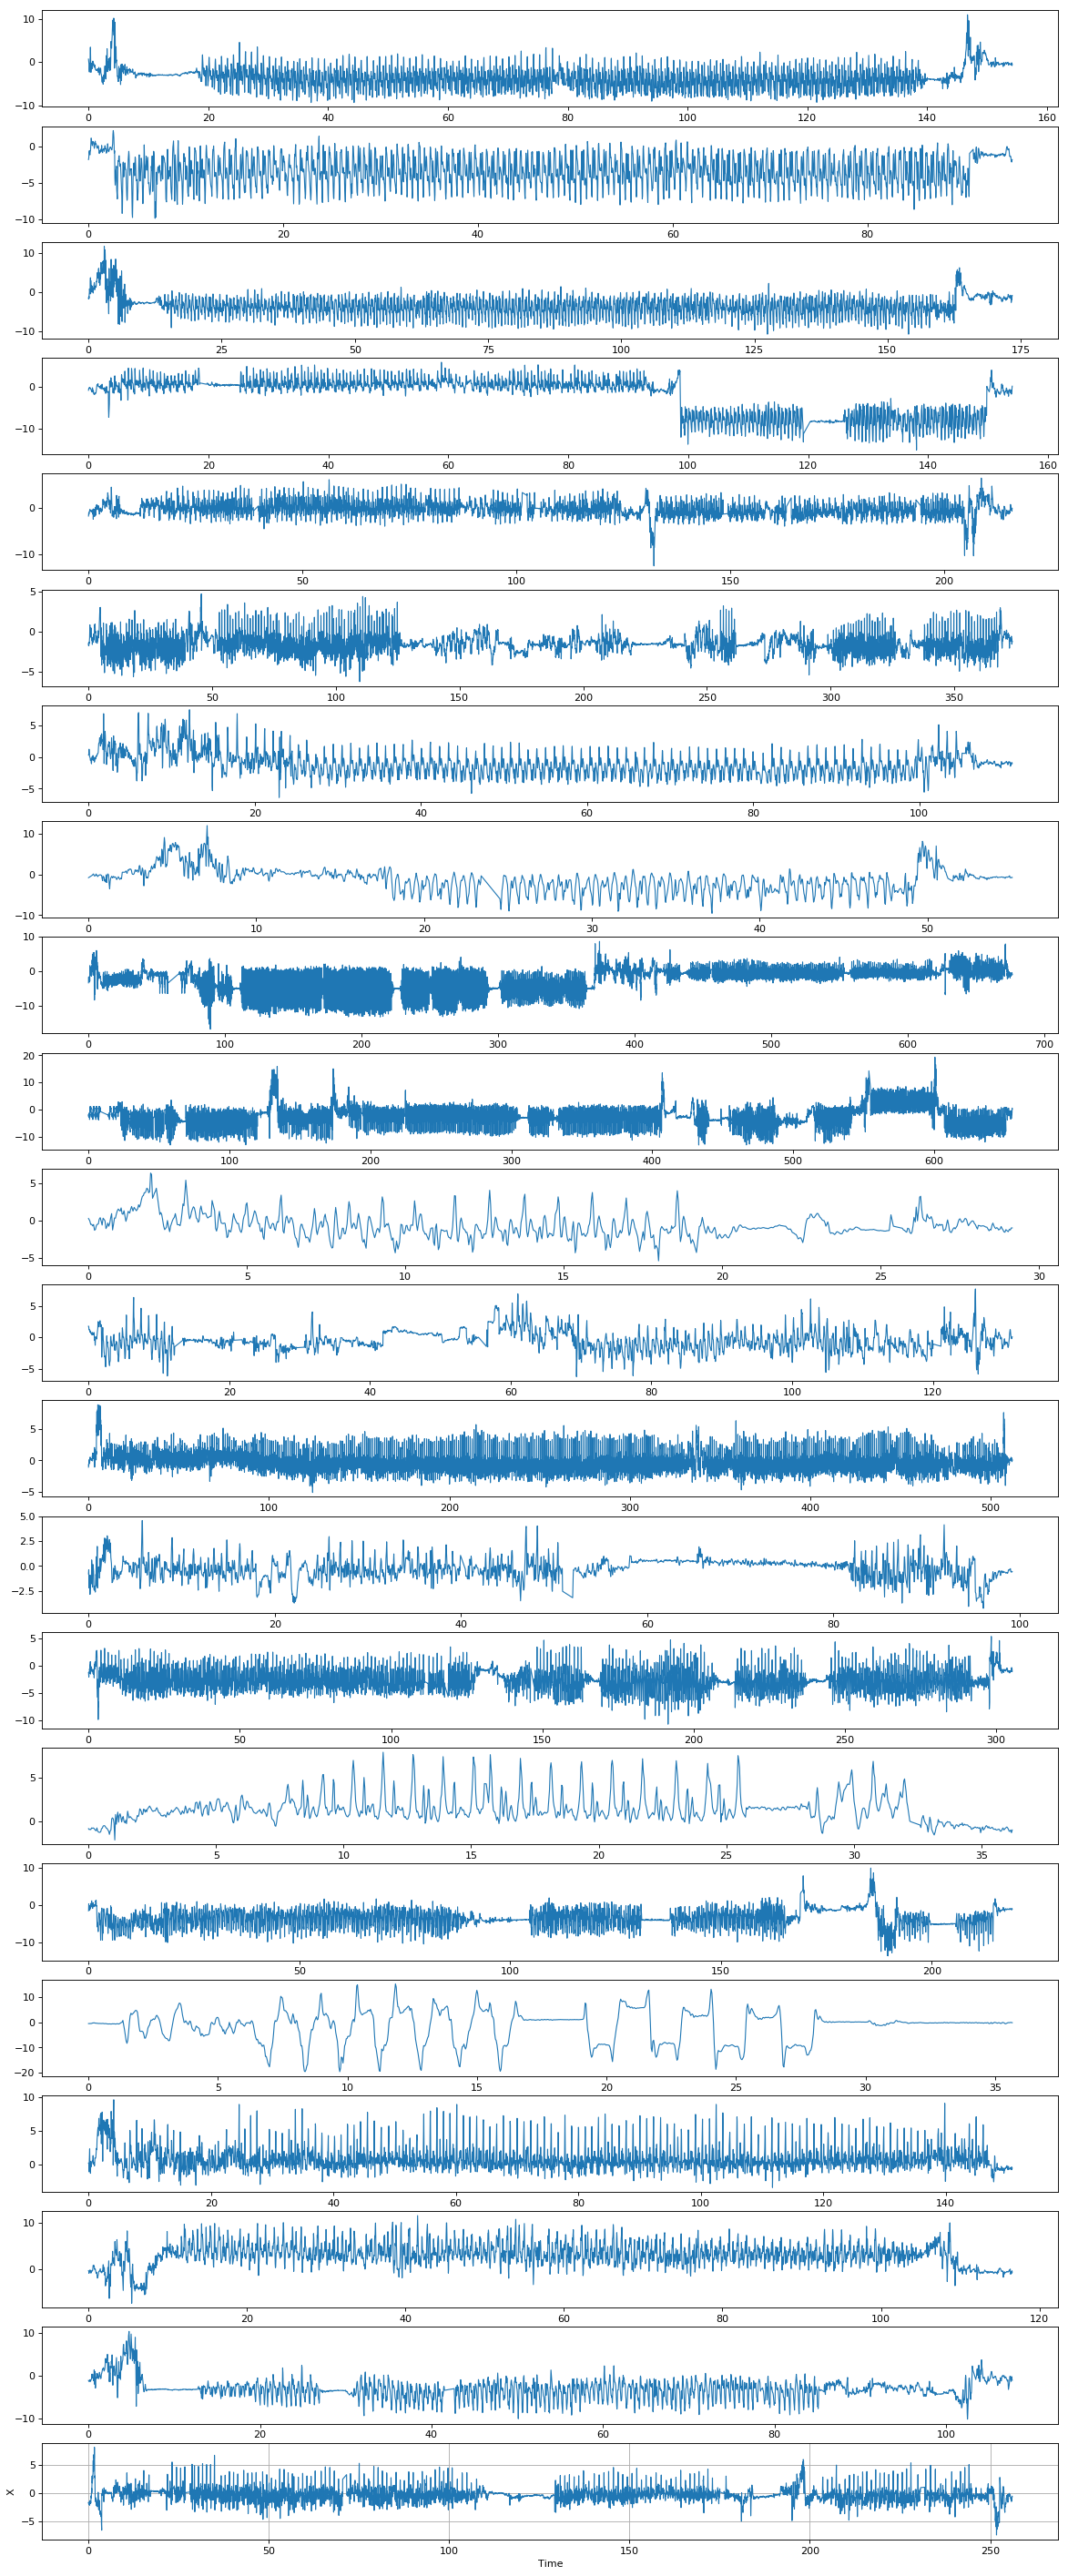

In [284]:
plot_basic_figures('X', save = True)

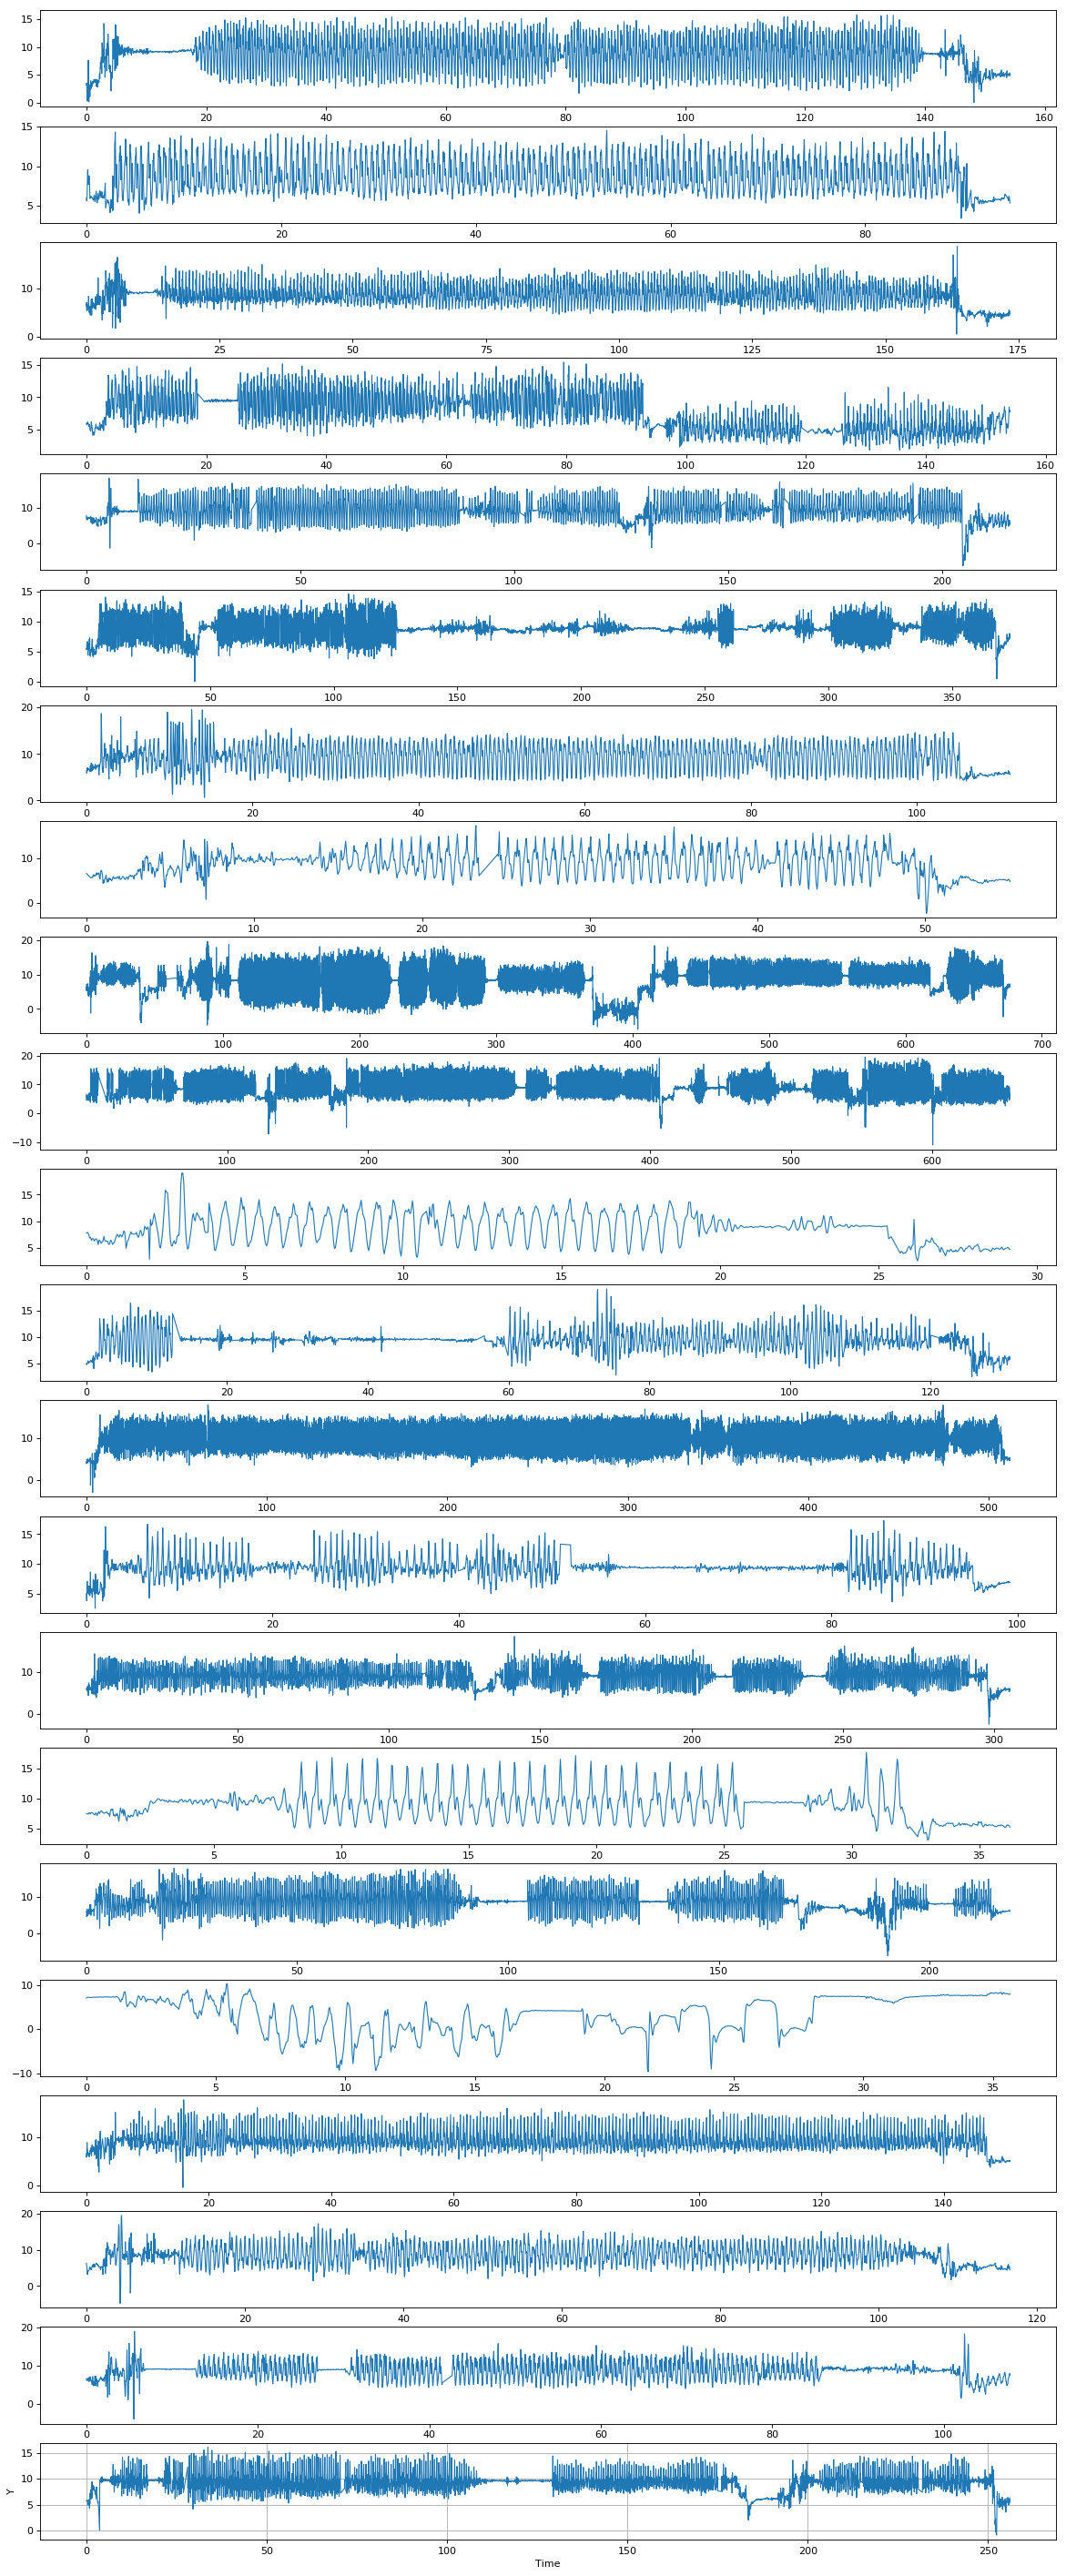

In [285]:
plot_basic_figures('Y', save = True)

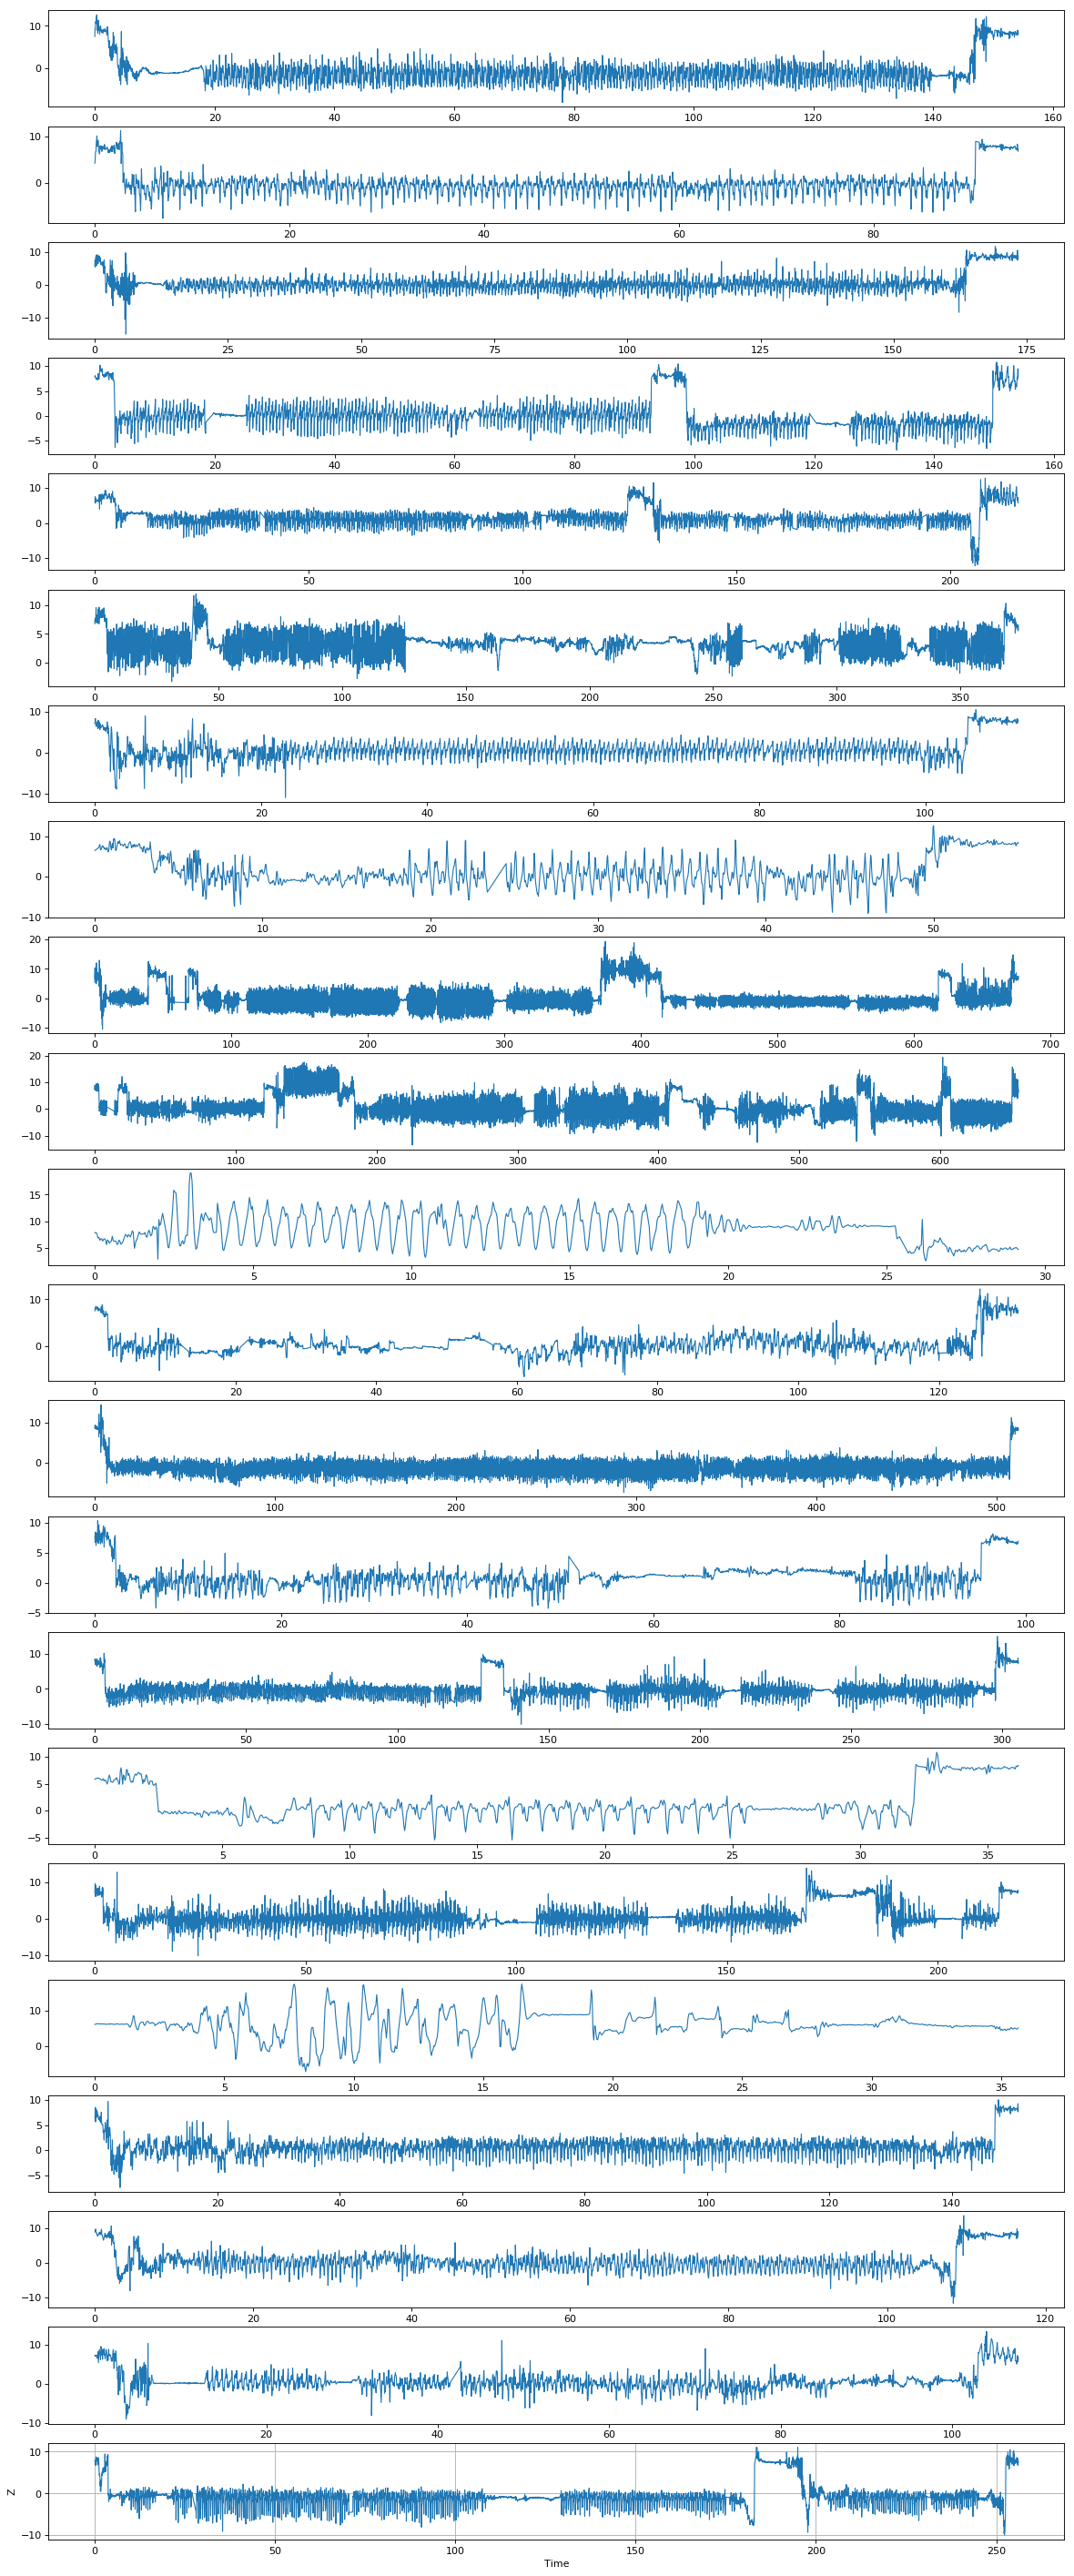

In [286]:
plot_basic_figures('Z', save = True)

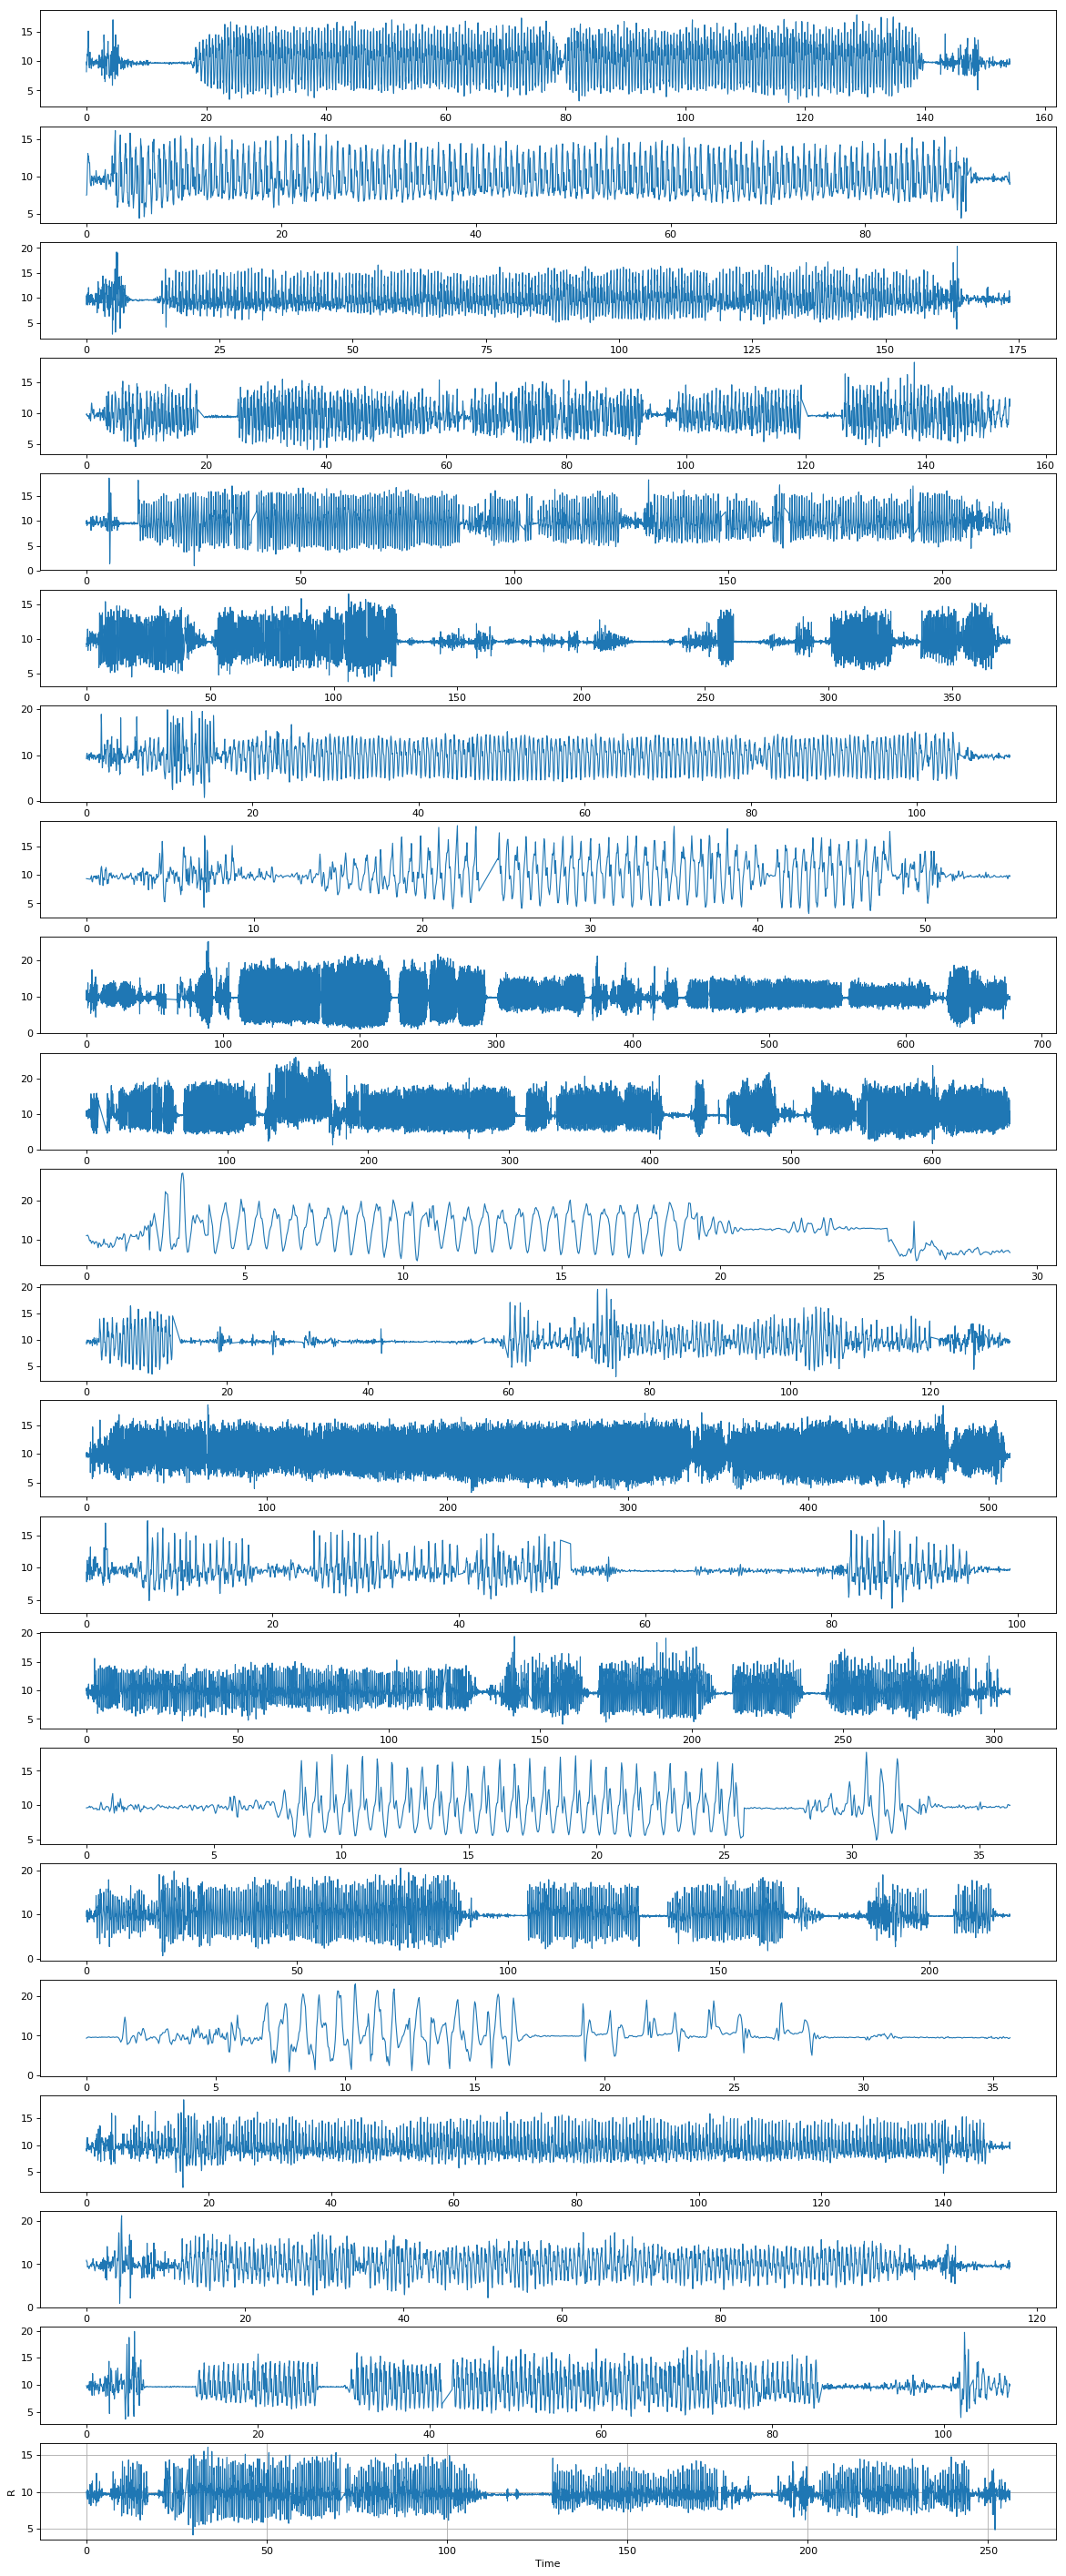

In [287]:
plot_basic_figures('R', save = True)

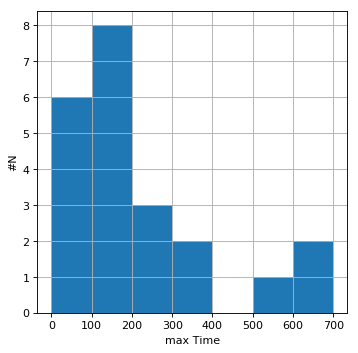

In [290]:
plot_variable('Time', 0, 800, 100, save=True)

There is 14 persons with recorded number of timestamps smaller than 200 time units. There is only 3 people that have more than 500 time units of their activity recorded. Let's zoom in to the small values.  

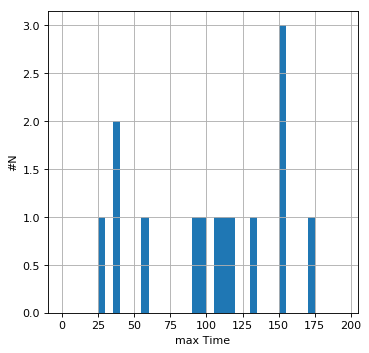

In [291]:
plot_variable('Time', 0, 200, 5, save=True)

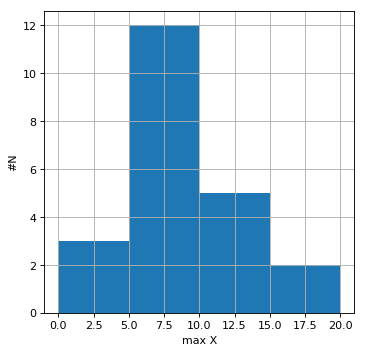

In [292]:
plot_variable('X', 0, 25, 5, save=True)

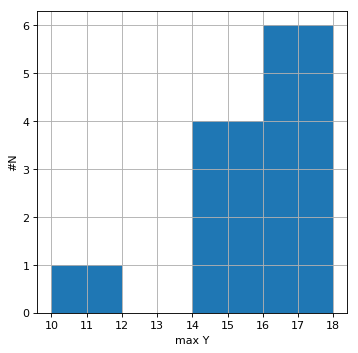

In [293]:
plot_variable('Y', 10, 20, 2, save=True)

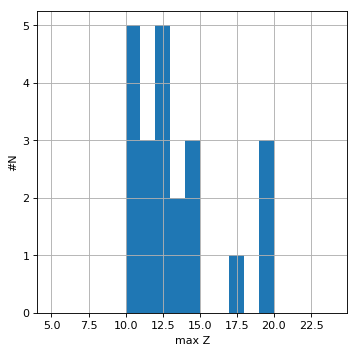

In [294]:
plot_variable('Z', 5, 25, 1, save=True)

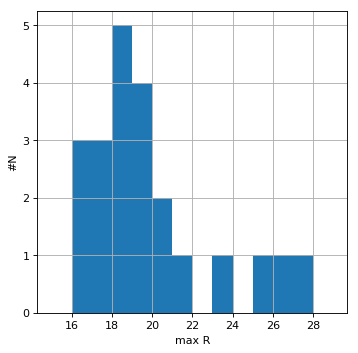

In [295]:
plot_variable('R', 15, 30, 1, save=True)

In [212]:
for index, d in df.items():
    print(index)
    print(d.describe())
    print(d.isnull().sum())

0
             Time            X            Y            Z            R
count  5069.00000  5069.000000  5069.000000  5069.000000  5069.000000
mean     76.81745    -3.554254     8.557989    -0.844095    10.072604
std      44.23811     2.486629     2.956517     2.913708     2.922008
min       0.00000    -9.343600     0.000000    -7.927000     2.956867
25%      38.57000    -5.284700     6.129200    -2.601500     7.851683
50%      76.82000    -3.486800     8.921300    -1.144100     9.881105
75%     115.01000    -2.179300    10.651000    -0.040861    12.184767
max     154.20000    10.951000    15.786000    12.599000    17.870653
Time    0
X       0
Y       0
Z       0
R       0
dtype: int64
1
              Time            X            Y            Z            R
count  3086.000000  3086.000000  3086.000000  3086.000000  3086.000000
mean     47.242717    -3.284640     8.731872    -0.191078     9.893818
std      27.207449     2.019642     2.193697     2.633023     2.236937
min       0.000000 

Time    0
X       0
Y       0
Z       0
R       0
dtype: int64
12
               Time             X             Y             Z             R
count  16949.000000  16949.000000  16949.000000  16949.000000  16949.000000
mean     255.903473     -0.237533      9.672159     -0.937886     10.050365
std      147.656364      1.487338      2.604398      1.911993      2.475336
min        0.000000     -5.134900     -2.955600     -7.504800      3.313877
25%      128.140000     -1.144100      7.927000     -1.879600      8.452522
50%      255.760000     -0.463090      9.507000     -0.803600      9.819465
75%      383.670000      0.313270     11.305000     -0.081722     11.622083
max      511.920000      8.921300     18.088000     14.369000     18.517112
Time    0
X       0
Y       0
Z       0
R       0
dtype: int64
13
              Time            X            Y            Z            R
count  3082.000000  3082.000000  3082.000000  3082.000000  3082.000000
mean     49.394664    -0.246055     9.3178

No missing values in DataFrames.

Add some summarizing box plots for X, Y, Z, and R

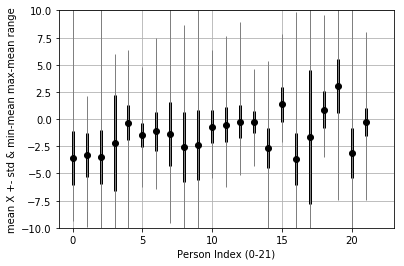

In [297]:
plot_summary('X', -10, 10, save=True)

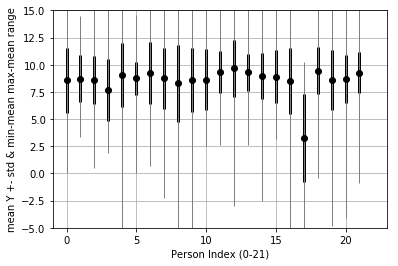

In [298]:
plot_summary('Y', -5, 15, save=True)

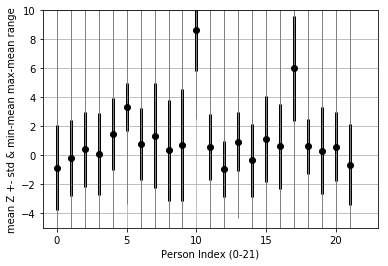

In [299]:
plot_summary('Z', -5, 10, save=True)

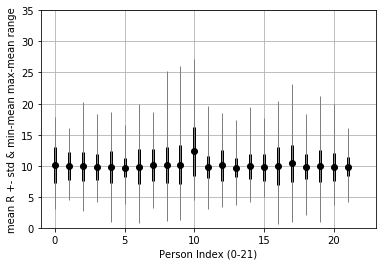

In [300]:
plot_summary('R', 0, 35, save=True)